# Headspace Marketing Campaign

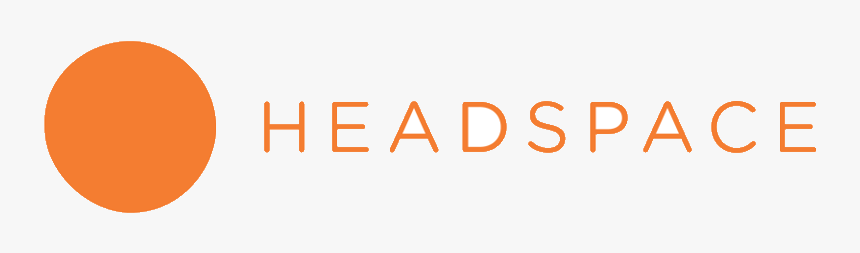

By: Seraj Khazei

# Overview

In this project, we are looking at Facebook status updates, and the neurotic score of each status. The neurotic score is based on the language used in the status update. The dataset includes more than 500,000 status updates. This dataset is well-suited for the business problem, as the goal is to identify individuals who express any sort of neurotic behavior through a social media platform. For data preparation, I dropped non-relevant columns and assigned neurotic or not neurotic to each status update based on if the status scored below or above the given threshold. Then, a function was created to insert into a vectorizer parameter and the function attained a tweet tokenizer as a tokenzier method and a lemmatizer as a method to group words with similar meaning as one root word. After a train-validation-test split was made with the status update as the predictor and neurotic or not neurotic as the target variable a TF-IDF vectorizer for a baseline model was made; due to the vectorizer being made for a simple model the parameter for max_features was set to 500. I also set a stopwords parameter inside the vectorizer to be applied to the status update because stopwords provide little to no sentiment value to the status, and set my custom function as the tokenizer. In order to train my model on a balanced dataset SMOTE is applied to eliminate the class imbalance observed in the target variable. Moving forward my baseline model was established and scored on the training set and validated on the validation set. The setup to my model iterations consisted of a pipeline in order to go through different complex models in a effienct manner as well as to allow for a grid search to be applied to my vectorizer hyperparamters. The grid search was also utilized to reveal which hyperparamters for my model gives the best score. Finally, the best model with the given hyperparamter was put to the test with the test set.

The libaries put into use: Pandas to perform data filtering, Matplotlib for visualization, NLTK to perform text preprocessing, Imblearn for SMOTE and Pipeline, Sklearn for Vectorization, Evalutaion metric, Gridsearch and Modeling.

For modeling: I utilized LogisticRegression, DecisionTree and RandomForestClassifier.

Evalutaion metric: Fbeta score with beta=2, this was my evaluation metric because the following metric was most compatible for my business problem.

My final model was a Logistic regression with a ridge regressor as my regularizer and newton-cg as my solver. The model had an fbeta score of 84% with the average parameter being set to "micro", which means that it correctly identifies neurotic status updates 84% of the time.

# Business Understanding

### Stakeholder

Headspace marketing team. Headspace is a mediation app that provides a library of guided mediations

### Business problem

Since the COVID-19 pandemic began everyone all around the world has had to endure a lot of hardship from losing jobs to catching the virus or experiencing a love one suffer from the virus. For the following reason along with many other factors anxiety and depression has had a spike since the pandemic started as shown in the bar chart below. As everyone is putting in efforts to bring society back to "normal" Headspace also wants to play their part by sending a special promotion via a social media platform to those who are experiencing depression and or anxiety, as Headspace understands mediation has been researched and concluded as a way to reduce mental ilness among individuals. This is where I come in to strategize a way to target the ads towards the following individuals and this notebook will be a demonstration for how the objective was tackled.

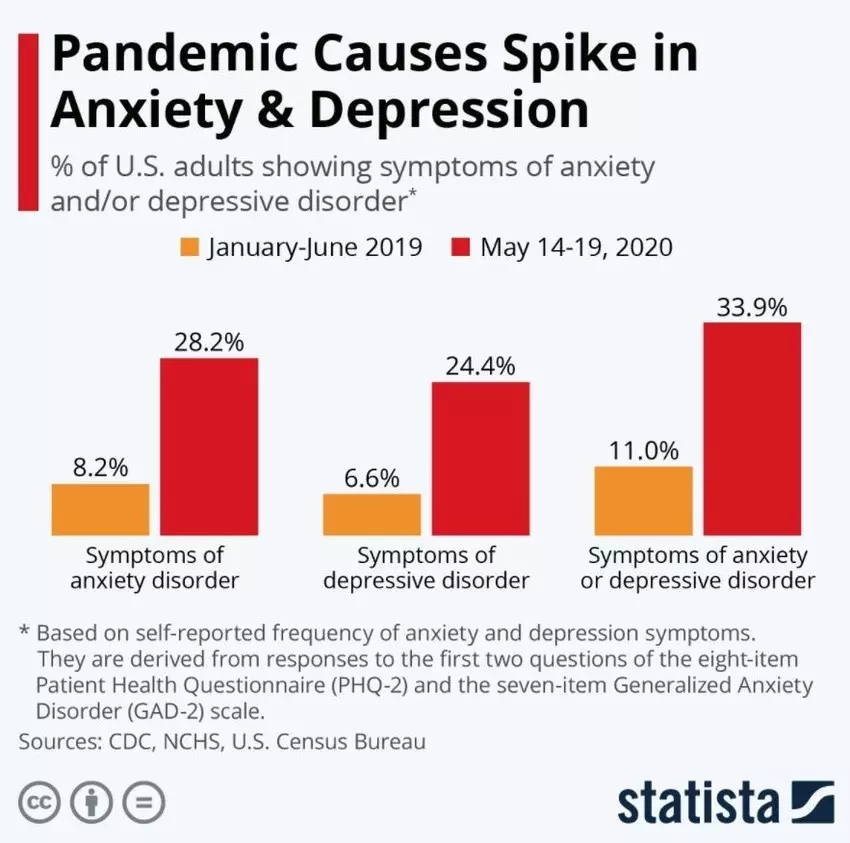

# Data 

### Data approach

My approach to identify anxious or depressive individuals was to use the big five personality trait framework and specifically put in use the neuroticism trait. For clarification the neuroticism trait is defined as individuals who are more prone to negative emotions such as anxiety, depression, anger, and stress. The way this personality trait will be utilized in a data science context will be to analyze the language used in a post and based on the language determine if the indivdual displays any indications of neurotic behavior. The justification for this approach to the business problem is as follows, with identifying neurotic individuals not only will we be able to capture individuals who openly talk about their mental health struggles via a social media platform, we will also be able to capture people who are more private about their personal mental struggles but still reveal some indications through use of language. Ultimatley this approach will hone in on the business problem to be able to reduce the statistics as much as possible and be able to recognize the wider audeince who are struggling with depression and or anxiety.

### Data understanding

The dataset put into use was acquried from a project conducted by a Data scientist in 2018 this [link](https://github.com/jcl132/personality-prediction-from-text) will lead you to the Github repo of that project. The following dataset takes in various status updates and scores them on the big five personality trait based on the use of language in the update. Although it will be important to keep in mind the reliability of the scores is questionable becuase in order to have accuracte psycometrics a longer stream of text is required compared to short phrases and sentences that are measured in this dataset.

# Libaries

All the Libaries necessary for the notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Data cleaning and visualization

from nltk.probability import FreqDist
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
# Text preprocessing

from sklearn.model_selection import train_test_split
# Splitting the data

from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorizer

from imblearn.over_sampling import SMOTE
from collections import Counter
# Class imbalance

from sklearn.metrics import plot_confusion_matrix, accuracy_score,plot_roc_curve,make_scorer, fbeta_score
# Metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Models

from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import GridSearchCV
# Model iterations

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Dataset/master_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
# Dataset

# Data Preparation

In [2]:
df

,status_update,Openness,Consciousness,Extraversion,Agreeablenes,Neuroticism
0,likes the sound of thunder.,4.4,3.25,2.65,3.15,3.00
1,is so sleepy it's not even funny that's she ca...,4.4,3.25,2.65,3.15,3.00
2,is sore and wants the knot of muscles at the b...,4.4,3.25,2.65,3.15,3.00
3,likes how the day sounds in this new song.,4.4,3.25,2.65,3.15,3.00
4,is home. <3,4.4,3.25,2.65,3.15,3.00
...,...,...,...,...,...,...
570149,can't wait until next sunday! <3,3.0,4.00,4.00,4.50,1.25
570150,babysitting :),3.0,4.00,4.00,4.50,1.25
570151,"Dear COD,\r\ni hate you. You consistantly stea...",3.0,4.00,4.00,4.50,1.25
570152,is in an amazing mood for some unknown reason XD,3.0,4.00,4.00,4.50,1.25


In [3]:
df['status_update'] = df['status_update'].astype(str)
# This transforms 'status_update' into a string object to allow for text preprocessing

The only relevant columns associated with my business problem will be `status_update` and `Neuroticism`

In [4]:
df_1 = df.drop(['Openness','Consciousness','Extraversion','Agreeablenes'], axis=1)

In [5]:
df_1['Neuroticism'].value_counts()

2.75    49841
3.00    46210
3.25    39221
2.25    38850
2.50    38214
        ...  
2.58       19
2.18       16
2.81       10
3.74        2
1.56        1
Name: Neuroticism, Length: 176, dtype: int64

The function below creates a target variable and prepares the dataset for the classification models ahead  
- (1): represents the user behind the status update has indications of `Neuroticism`
 
- (0): represents the user behind the status update does not have indications of `Neuroticism`

In [6]:
def number_map(x):
    if x > 3.50:
        return 1
    else:
        return 0
# A Neuroticism score higher than the median means being of risk to depression

In [7]:
df_1['Neuroticism'] = df_1['Neuroticism'].apply(number_map) 
# applying the above function to the 'Neuroticism' column

This bar plot protrays the class imbalance that consist in our dataset

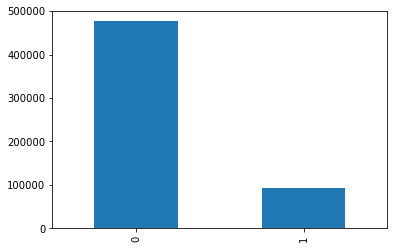

In [8]:
df_1['Neuroticism'].value_counts().plot(kind='bar');

## Text exploratory analysis

In [9]:
# from nltk.probability import FreqDist

In [10]:
fdist = FreqDist(df_1['status_update'])
top_ten = fdist.most_common(10)
top_ten 
# viewing the top 10 most used 'words' in all of our status updates

[(':)', 259),
 (':(', 236),
 ('<3', 146),
 ('...', 98),
 (':D', 98),
 (':/', 86),
 ('.', 52),
 ('?', 50),
 ('bored', 48),
 (":'(", 39)]

In [ ]:
# import matplotlib.pyplot as plt

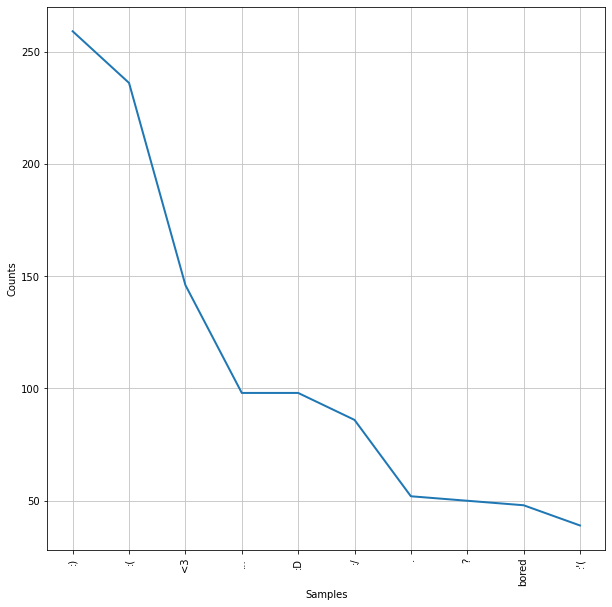

In [11]:
plt.figure(figsize=(10, 10))
fdist.plot(10);
# Visually inspecting the above cell

## Text preprocessing

In the cell below the 
- "Since Facebook style of post do not include handles "@" I will not get rid of handels but will get rid of repetive characters that may be taking part in any status update.  
- "lemmatizer" will located words that have the same meaning and deduct them down to their root words in order to prevent the same word to be counted as seperate occasions
- Then a function is created with the the tokenizer and lemmatizer in order to apply the feature engingeering inside a TF-IDF vectorizer parameter

In [12]:
# from nltk.tokenize import TweetTokenizer
# from nltk.corpus import stopwords
# from nltk.stem.wordnet import WordNetLemmatizer

In [57]:
tokenizer = TweetTokenizer(strip_handles=False, reduce_len=True) 

lemmatizer = WordNetLemmatizer()

def lemmatize_and_tokenize(text):
    tokens = tokenizer.tokenize(text)
    return [lemmatizer.lemmatize(token) for token in tokens]

# Modeling Preparation

## Train, Validation, and Test split

In [14]:
# from sklearn.model_selection import train_test_split

The `X` will represent the predictors

The `y` will represent the target variable

In [15]:
X = df_1['status_update']
y = df_1['Neuroticism']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
## TRAIN TEST SPLIT

In order to check for overfitting and underfitting a validation set will be made as well.

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
## TRAIN Validation SPLIT

### TFIDF  Vectorization

Now that the dataset is cleaned, lemmatized and tokenized, it can now be converted into a vector format. In order to do so, TF-IDF vectorization will be used. This method is based on the idea that rare words are more valuable for prediction. The method utilizes two metrics:

- TF (term frequency) refers to the ratio of number of times a word appear in the document to the total number of words in the document.
- IDF (Inverse Document Frequency) refers to the logged ratio of number of documents to the number of documents including the word.

In [18]:
# from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer(max_features=500, stop_words='english', tokenizer=lemmatize_and_tokenize)

# Instantiating my vectorizer and applying the neccesary parameters

In [20]:
X_train_vectorized = tfidf.fit_transform(X_train)
#Fit the vectorizer on"status_update" and transform it

In [21]:
X_val_vectorized = tfidf.transform(X_val)
# Same process on the validation set 

X_val_df = pd.DataFrame.sparse.from_spmatrix(X_val_vectorized, columns=tfidf.get_feature_names())
# Visually inspect the validation vectorized data

In order to deal with the imbalance displayed above we will be using `SMOTE` with a minority sampling strategy in order to not lose any data

In [22]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

The Counter package protrays that we resampled our class "1" to match the size of class "0"

In [23]:
smote = SMOTE(sampling_strategy='minority',random_state=42)

X_train_ros, y_train_ros = smote.fit_resample(X_train_vectorized, y_train)

print('Old shape of y:' + str(Counter(y_train)))
print('New shape of y:' + str(Counter(y_train_ros)))

Old shape of y:Counter({0: 268360, 1: 52351})
New shape of y:Counter({0: 268360, 1: 268360})


In [24]:
X_train_df = pd.DataFrame.sparse.from_spmatrix(X_train_ros, columns=tfidf.get_feature_names())
# Now we can visually inspect the X_train vectorized data after we resampled

print(X_train_df.columns.tolist())
# This allows for us to view which words will be used for the baseline model

['!', '"', '$', '%', '&', "'", '(', '(:', ')', '*', '+', ',', '-', '.', '. . .', '..', '...', '/', '1', '10', '12', '2', '2010', '3', '4', '5', '6', '7', '8', '9', ':', ':(', ':)', ':-)', ':/', ':d', ':p', ';', ';)', '<', '<3', '=', '=)', '=]', '=d', '>', '?', '@', '[', ']', '^', '_', '___', '`', 'able', 'actually', 'amazing', 'ang', 'anymore', 'ask', 'away', 'awesome', 'b', 'baby', 'bad', 'band', 'beach', 'beat', 'beautiful', 'bed', 'believe', 'best', 'better', 'big', 'birthday', 'bit', 'bitch', 'black', 'blue', 'body', 'book', 'bored', 'bout', 'boy', 'break', 'bring', 'brother', 'busy', 'buy', 'c', 'called', 'came', "can't", 'car', 'care', 'cause', 'chance', 'change', 'check', 'child', 'christmas', 'class', 'close', 'cold', 'come', 'coming', 'comment', 'computer', 'cool', 'copy', 'crap', 'crazy', 'cut', 'cute', 'cuz', 'd', 'da', 'dad', 'damn', 'dance', 'day', 'dead', 'dear', 'did', "didn't", 'die', 'dinner', 'doe', "doesn't", 'dog', 'doing', "don't", 'dont', 'dream', 'drink', 'drive'

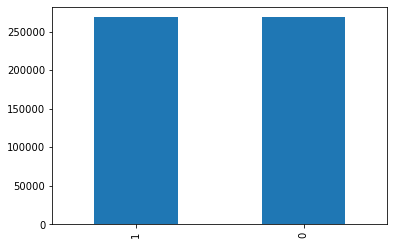

In [25]:
y_train_ros.value_counts().plot(kind='bar');

# First Simple Model

## Logistic Regression

Logistic Regression was chosen as the baseline model for the reason being that that this model provides the simplest explainability in comparison to other models, computationaly effient, and this model is frequently used for simple binary classification problems

## Metric:  F-beta score with beta=2

The reason for my metric of choosing can be traced back to the business understanding as my stakeholders priority is detecting the neurotic individuals as frequent as possible hence with beta = 2 the fbeta evaluation metric will put more weight on recall to allow for the model to put an emphasis on class 1, while at the same time not totally dismissing precision because too many false postives can lead to a lower profit rate. I will set the average parameter as 'average' because the following will display how well my model was able to classify each class while taking the imbalance into account.

In [26]:
# from sklearn.metrics import fbeta_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

In [27]:
logreg = LogisticRegression()

logreg.fit(X_train_df, y_train_ros)

y_train_pred = logreg.predict(X_train_df)
y_val_pred = logreg.predict(X_val_df)

In [29]:
validation_accuracy = accuracy_score(y_val,y_val_pred)

training_f2_score = fbeta_score(y_train_ros, y_train_pred, average ='weighted', beta=2)
validation_f2_score = fbeta_score(y_val, y_val_pred, average ='weighted', beta=2)

print(f'training fbeta score:{training_f2_score}')
print(f'validation fbeta score:{validation_f2_score}')

training fbeta score:0.5937954697504543
validation fbeta score:0.5689461588852547


Validation: Accuracy:0.5557228915662651


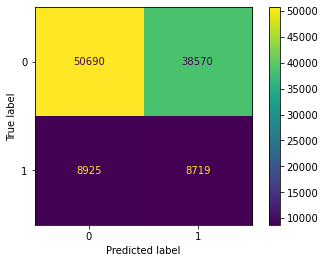

In [30]:
print(f'Validation: Accuracy:{validation_accuracy}')
plot_confusion_matrix(logreg,X_val_df,y_val);

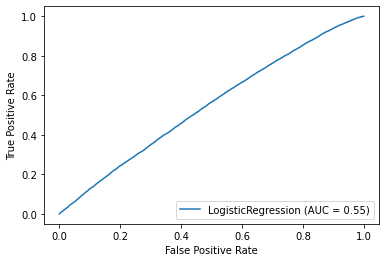

In [31]:
plot_roc_curve(logreg,X_val_df,y_val)

### Baseline model debrief

The baseline model was able to correctly classify the target variable 56% of the time with no tuning. The first model iteration will be a step up model from the baseline.

# Model Iterations

The model iterations will go through a pipeline that consists of steps similar to cells above in order to go about each iteration in a efficent manner. The first step of the pipelie will be the TF-IDF vectorizer, although instead of a max_features parameter in the TF_IDF vectorizer I will be using the min_df and max_df parameters and the following parameters will be passed through a gridsearch in order to discover how many words will be neccesary with coherence to the model. As well as a "ngram_range" will be set to allow for grouping of words which will ultimaley give more predictive power to the models. Then SMOTE will be the next step in pipeline to train the model on a balanced dataset. Finally the model in test will be the final step.

## Model Iterations #1  

### Logistic Regression

In [32]:
# from sklearn.metrics import make_scorer
# from imblearn.pipeline import Pipeline as imbpipeline
# from sklearn.model_selection import GridSearchCV

In [33]:
log_pipeline = imbpipeline(steps=[
          ('vect', TfidfVectorizer(stop_words='english', tokenizer=lemmatize_and_tokenize,
                                   strip_accents='ascii',ngram_range =(1,3))),
           ('smote', SMOTE(sampling_strategy='minority',random_state=42)),
           ('logreg', LogisticRegression()) 
])
           

log_parameters = {
 'vect__max_df' : [1,0.8],
 'vect__min_df' : [1],  
 'logreg__penalty': ['l2','l1'],
 'logreg__solver': ['newton-cg', 'lbfgs']   
}

gs_logreg = GridSearchCV(log_pipeline, log_parameters, scoring= make_scorer(fbeta_score, beta=2))
gs_logreg.fit(X_train, y_train)
gs_logreg.best_params_

{'logreg__penalty': 'l2',
 'logreg__solver': 'lbfgs',
 'vect__max_df': 1,
 'vect__min_df': 1}

In [34]:
y_train_pred = gs_logreg.predict(X_train)
y_val_pred = gs_logreg.predict(X_val)

training_f2_score = fbeta_score(y_train, y_train_pred, average ='weighted', beta=2)
validation_f2_score = fbeta_score(y_val,y_val_pred, average ='weighted', beta=2)

validation_accuracy = accuracy_score(y_val,y_val_pred)

In [35]:
print(f'training fbeta score:{training_f2_score}')
print(f'validation fbeta score:{validation_f2_score}')

training fbeta score:0.9420124357008086
validation fbeta score:0.8362740597134525


Validation: Accuracy:0.8423071166654195


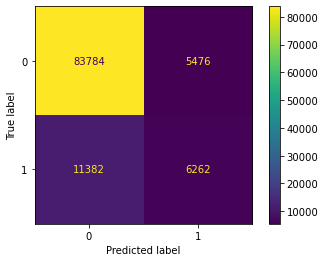

In [36]:
print(f'Validation: Accuracy:{validation_accuracy}')
plot_confusion_matrix(gs_logreg,X_val,y_val);

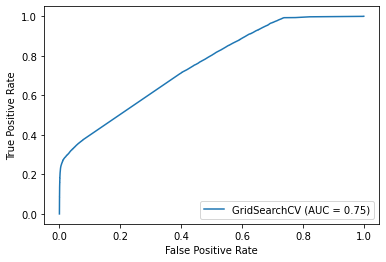

In [37]:
plot_roc_curve(gs_logreg,X_val,y_val)

### Logistic Regression debrief

The logistic regressions best parameters revelead that it can correclty classify the target variable 84% of the time although the clear overfitting should not go unnoticed. Next will be a step up to a more complex classification model; Decision Tree

## Model Iterations #2

### Decision Tree

In [38]:
# from sklearn.tree import DecisionTreeClassifier

In [39]:
dtc_pipeline = imbpipeline(steps=[
           ('vect', TfidfVectorizer(stop_words='english', tokenizer=lemmatize_and_tokenize, 
                                    strip_accents='ascii',ngram_range =(1,3))),
           ('smote', SMOTE(sampling_strategy='minority',random_state=42)),
           ('dtc', DecisionTreeClassifier()) 
])
           

dtc_parameters = {
 'vect__max_df' : [1,0.8],
 'vect__min_df' : [1],
 'dtc__criterion': ['gini', 'entropy'],
 'dtc__max_depth': [50,100]      
}

gs_dtc = GridSearchCV(dtc_pipeline, dtc_parameters, scoring= make_scorer(fbeta_score, beta=2))
gs_dtc.fit(X_train, y_train)
gs_dtc.best_params_

{'dtc__criterion': 'gini',
 'dtc__max_depth': 100,
 'vect__max_df': 1,
 'vect__min_df': 1}

In [40]:
y_train_pred = gs_dtc.predict(X_train)
y_val_pred = gs_dtc.predict(X_val)

training_f2_score = fbeta_score(y_train, y_train_pred, average ='weighted', beta=2)
validation_f2_score = fbeta_score(y_val,y_val_pred, average ='weighted', beta=2)

validation_accuracy = accuracy_score(y_val,y_val_pred)

In [41]:
print(f'training fbeta score:{training_f2_score}')
print(f'validation fbeta score:{validation_f2_score}')

training fbeta score:0.8057922197487766
validation fbeta score:0.8033330070303436


Validation: Accuracy:0.8350295592307116


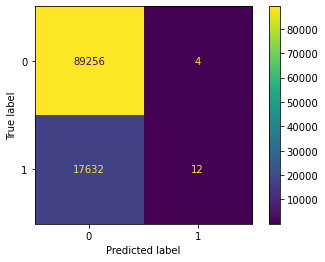

In [42]:
print(f'Validation: Accuracy:{validation_accuracy}')
plot_confusion_matrix(gs_dtc,X_val,y_val);

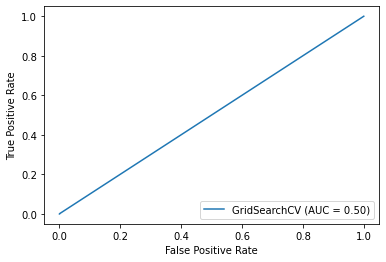

In [43]:
plot_roc_curve(gs_dtc,X_val,y_val)

### Decsion Tree debrief

A tuned Decsion tree was able to classify an individual 80% of the time, this shows our logistic regression still is the best performing model. Next step up model will be an esemble model which will be the most complex model used in this notebook; the random forest classifier.

## Model Iterations #3

### Random Forest

In [44]:
#from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc_pipeline = imbpipeline(steps=[
           ('vect', TfidfVectorizer(stop_words='english', tokenizer=lemmatize_and_tokenize, 
                                    strip_accents='ascii',ngram_range =(1,3))),
           ('smote', SMOTE(sampling_strategy='minority',random_state=42)),
           ('rfc', RandomForestClassifier()) 
])
           

rfc_parameters = {
 'vect__max_df' : [1,0.8],
 'vect__min_df' : [1],
 'rfc__criterion': ['gini', 'entropy'],
 'rfc__max_depth': [50,100]        
}

gs_rfc = GridSearchCV(rfc_pipeline, rfc_parameters, scoring= make_scorer(fbeta_score, beta=2))
gs_rfc.fit(X_train, y_train)
gs_rfc.best_params_

{'rfc__criterion': 'gini',
 'rfc__max_depth': 100,
 'vect__max_df': 1,
 'vect__min_df': 1}

In [46]:
y_train_pred = gs_rfc.predict(X_train)
y_val_pred = gs_rfc.predict(X_val)

training_f2_score = fbeta_score(y_train, y_train_pred, average ='weighted', beta=2)
validation_f2_score = fbeta_score(y_val,y_val_pred, average ='weighted', beta=2)

validation_accuracy = accuracy_score(y_val,y_val_pred)

In [47]:
print(f'training fbeta score:{training_f2_score}')
print(f'validation fbeta score:{validation_f2_score}')

training fbeta score:0.823822056207693
validation fbeta score:0.8089978369822861


Validation: Accuracy:0.8380135448626805


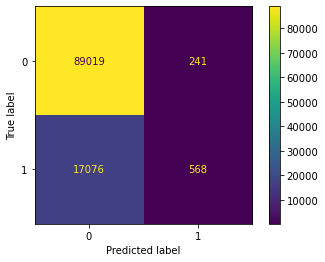

In [48]:
print(f'Validation: Accuracy:{validation_accuracy}')
plot_confusion_matrix(gs_rfc,X_val,y_val);

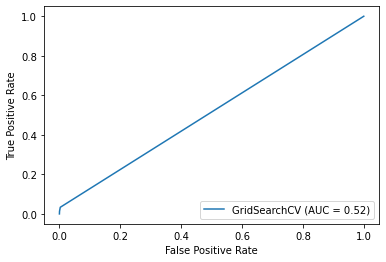

In [69]:
plot_roc_curve(gs_rfc,X_test,y_test)

### Random Forest debrief

The random forest classifer was able to predict a Neuroitc indivudal 80% of the leaving the Logistic Regression as the highest performing model. Even though the Logistic Regression was overfitting it will be used as the final model and if the score doesn't significanly decrease from the validation set it will be a indiciation that the overfitting has platued and will withstand as the best performing model and be solidified as my final model.

# Final Model

### TfidfVectorizer: max_df=1, min_df=1
### Logistic regression: penalty ='l2' and solver = ''lbfgs''

In [58]:
log_pipeline_t = imbpipeline(steps=[
           ('vect', TfidfVectorizer(max_df=1, min_df=1, stop_words='english', tokenizer=lemmatize_and_tokenize, 
                                    strip_accents='ascii',ngram_range =(1,3))),
           ('smote', SMOTE(sampling_strategy='minority',random_state=42)),
           ('logreg', LogisticRegression(penalty ='l2', solver = 'lbfgs'))])
# setting all the parameters in the pipeline as the best performing paramters

In [59]:
log_pipeline_t.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=1, ngram_range=(1, 3),
                                 stop_words='english', strip_accents='ascii',
                                 tokenizer=<function lemmatize_and_tokenize at 0x7fb680e89e50>)),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('logreg', LogisticRegression())])

In [60]:
y_test_preds = log_pipeline_t.predict(X_test)

In [61]:
test_f2_score = fbeta_score(y_test,y_test_preds, average ='weighted', beta=2)
print(f'Test_fbeta_score:{test_f2_score}')

Test_fbeta_score:0.834002906042863


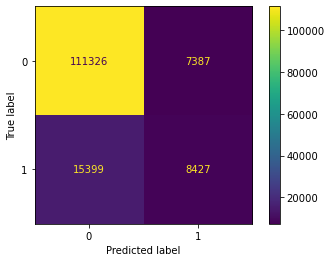

In [63]:
plot_confusion_matrix(log_pipeline_t, X_test,y_test);

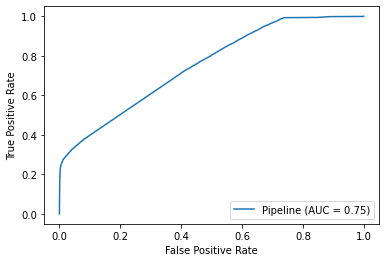

In [64]:
plot_roc_curve(log_pipeline_t,X_test,y_test)

In [67]:
#Finding feature importance
log_model_cv_coefs = pd.Series(index=log_pipeline_t.named_steps['vect'].get_feature_names(), 
                               data=log_pipeline_t['logreg'].coef_[0]).sort_values(ascending=True)

log_model_cv_coefs = pd.DataFrame(log_model_cv_coefs)

log_model_odds_ratio=log_model_cv_coefs
log_model_odds_ratio.head(10)

,0
enjoy enjoy :),-0.3855
"stab people ,",-0.3855
stab people stupidity,-0.3855
happy new orleans,-0.3855
change facebook user,-0.3855
fadin away ...,-0.3855
panini ...,-0.3855
didnt want ...,-0.3855
stupid drama .,-0.3855
way ! regret,-0.3855


# Conclusion

The goal of this project was to come up with a method to identify individuals who show indications of Neuroticism in order to send them promotional ads to ulitmatley try to reduce the recent spike of depression and or anxiety. This was done by creating multiple classification models and identified the best one as a logistic regression model with an fbeta score of 83%. This model will allow our stakeholder to identify the neurotic users and target their ads accordingly.

# Future Research

Due to time constraints for this project I was not be able to proceed with the initial plan to use twitter's API as my social media platform and Humantics API as my means of assessing for a neurotic score, with more time and the use of the mentioned API's the overall project would allow for more valuable models/insights. Also to take into consideration majority of the status updates were non-neurotic, more neurotic status updates should gathered in order to eliminate class imbalance without artificial methods. As well as gather data from various other media platforms to be able to reach a wider audience. My personal improvement on future NLP projects will be to conduct complex feature engineering to allow for the model to output higher accurate scores.